<a href="https://colab.research.google.com/github/HarshadNSuthar/Stock-Market-Google-Using-RNN/blob/master/Stock_Market_Google_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import datetime

In [7]:
#importing Datasets

from google.colab import files

uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [8]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
import io

# After Loading importing in pandas DataFrame

Google = pd.read_csv(io.StringIO(uploaded['Google_Stock_Price_Train.csv'].decode('utf-8')))

User uploaded file "Google_Stock_Price_Train.csv" with length 63488 bytes


In [72]:
Google.head()

,Date,Open,High,Low,Close,Volume,Close:30 Day Mean
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0,NaN
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0,NaN
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0,NaN
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0,NaN
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0,NaN


In [73]:
Google.isna().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close:30 Day Mean    29
dtype: int64

In [74]:
Google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1258 non-null   object 
 1   Open               1258 non-null   float64
 2   High               1258 non-null   float64
 3   Low                1258 non-null   float64
 4   Close              1258 non-null   float64
 5   Volume             1258 non-null   float64
 6   Close:30 Day Mean  1229 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.9+ KB


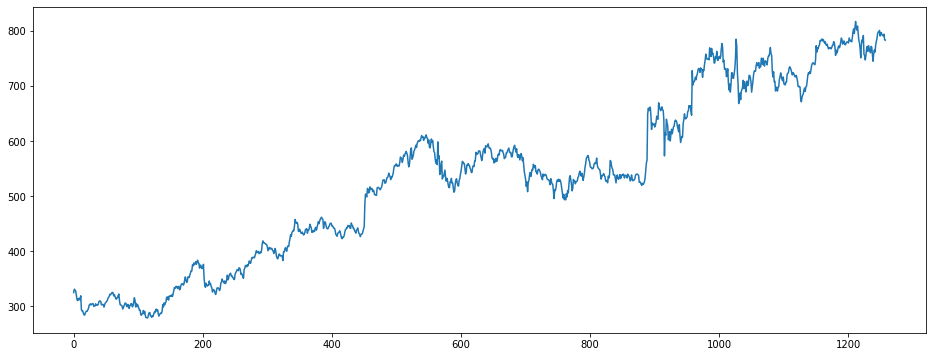

In [75]:
Google['Open'].plot(figsize=(16,6))

In [76]:
# 7 day rolling mean
Google.rolling(7).mean().head(20)  # we are getting mean for 7 days

,Open,High,Low,Close,Volume,Close:30 Day Mean
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,323.002857,325.392857,318.682857,643.132857,7.208100e+06,NaN
7,321.457143,322.882857,316.841429,638.037143,6.691514e+06,NaN
8,318.698571,319.801429,314.025714,631.870000,6.531857e+06,NaN
9,316.552857,317.524286,311.851429,627.534286,6.137929e+06,NaN


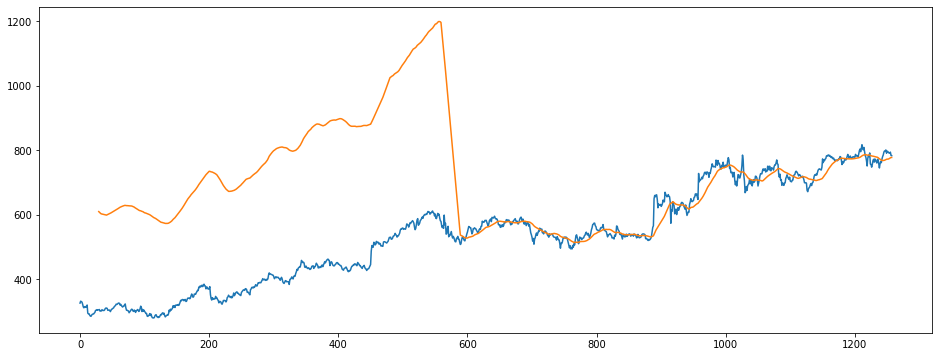

In [77]:
Google["Open"].plot(figsize=(16,6))

Google.rolling(window=30).mean()['Close'].plot()  # it gives moving avg of past 30 days

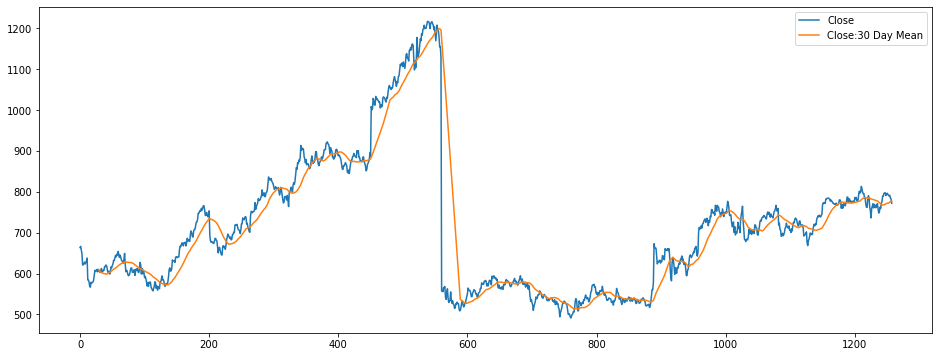

In [78]:
Google['Close:30 Day Mean'] = Google['Close'].rolling(window=30).mean()
Google[['Close','Close:30 Day Mean']].plot(figsize=(16,6))

In [0]:
training_set= Google['Open']
training_set = pd.DataFrame(training_set)

In [0]:
# Feature scalling

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_set_scale = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timestep and 1 output
x_train = []
y_train = []

for i in range(60, 1258):
  x_train.append(training_set_scale[i-60 : i, 0])
  y_train.append(training_set_scale[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

#Reshapiing

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [0]:
# part 2 - Building the RNN

# Importing the keras Libraries and package

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# #Initializing the RNN
regressor = Sequential()

In [0]:
# adding First LSTM layer and Dropout regularisation 

regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# adding Second LSTM layer and Dropout regularisation 
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# adding third LSTM layer and Dropout regularisation 
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# adding fourt LSTM layer and Dropout regularisation 
regressor.add(LSTM(units=50,))
regressor.add(Dropout(0.2))

# adding the output layer
regressor.add(Dense(units= 1))

In [113]:
# Compiling the RNN

regressor.compile(optimizer='adam', loss= 'mean_squared_error')

#Fitting the RNNN to the training set
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0058
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0035
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0036
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0034
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0031
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0033
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0035
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0032
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0032
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - lo

In [114]:
# Part 3 Making the predictions and visualising the result

# Getting real stock price of 2017

#importing Datasets

from google.colab import files

uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [115]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
import io

# After Loading importing in pandas DataFrame

Google_test = pd.read_csv(io.StringIO(uploaded['Google_Stock_Price_Test.csv'].decode('utf-8')))

User uploaded file "Google_Stock_Price_Test.csv" with length 1029 bytes


In [0]:
real_stock_price = Google_test.iloc[:, 1:2].values

In [117]:
Google_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [118]:
Google_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [0]:
Google_test['Volume'] = Google_test['Volume'].str.replace(',', "").astype(float) 

In [0]:
test_set = Google_test["Open"]
test_set= pd.DataFrame(test_set)

In [121]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


In [0]:
# Getting the predicted stock price of 2017

Google_total = pd.concat((Google["Open"], Google_test['Open']), axis = 0)

inputs = Google_total[len(Google_total) - len(Google_test)- 60:] .values
inputs= inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []

for i in range(60, 80):
    x_test.append(inputs[i-60 : i, 0])

x_test = np.array(x_test)

#reshaping
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [124]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


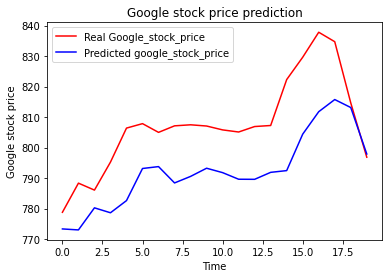

In [126]:
# Visualising the results
plt.plot(real_stock_price, color='red', label = "Real Google_stock_price")
plt.plot(predicted_stock_price, color = 'blue', label= "Predicted google_stock_price")
plt.title("Google stock price prediction")
plt.xlabel('Time')
plt.ylabel("Google stock price")
plt.legend()
plt.show()